In [127]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import os
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set()

# Define folder path in Google Drive
folder_path = '/content/drive/My Drive/sql in python/'

# File names and table names
file_names = {
    'brands': 'brands.csv',
    'categories': 'categories.csv',
    'customers': 'customers.csv',
    'order_items': 'order_items.csv',
    'orders': 'orders.csv',
    'products': 'products.csv',
    'staffs': 'staffs.csv',
    'stocks': 'stocks.csv',
    'stores': 'stores.csv'
}

# Create database connection using SQLAlchemy
db_path = 'sqlite:///bike_store.db'
engine = create_engine(db_path)

# Read CSVs and insert data into the database
for table_name, file_name in file_names.items():
    file_path = os.path.join(folder_path, file_name)

    try:
        # Read CSV
        data = pd.read_csv(file_path)

        # Insert data into the database
        data.to_sql(table_name, engine, if_exists='replace', index=False)

        print(f"✅ Data inserted successfully into '{table_name}' table.")
    except Exception as e:
        print(f"❌ Error inserting data into '{table_name}': {e}")

# Verify table names and row counts
try:
    with engine.connect() as conn:
        query = "SELECT name FROM sqlite_master WHERE type='table';"
        tables = pd.read_sql(query, conn)
        print("\n📚 Available Tables:")
        print(tables['name'].tolist())

        # Check row counts for each table
        for table_name in file_names.keys():
            query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
            row_count = pd.read_sql(query, conn).iloc[0]['row_count']
            print(f"📊 '{table_name}' contains {row_count} rows.")
except Exception as e:
    print(f"❌ Error verifying tables or row counts: {e}")


✅ Data inserted successfully into 'brands' table.
✅ Data inserted successfully into 'categories' table.
✅ Data inserted successfully into 'customers' table.
✅ Data inserted successfully into 'order_items' table.
✅ Data inserted successfully into 'orders' table.
✅ Data inserted successfully into 'products' table.
✅ Data inserted successfully into 'staffs' table.
✅ Data inserted successfully into 'stocks' table.
✅ Data inserted successfully into 'stores' table.

📚 Available Tables:
['brands', 'categories', 'customers', 'order_items', 'orders', 'products', 'staffs', 'stocks', 'stores']
📊 'brands' contains 9 rows.
📊 'categories' contains 7 rows.
📊 'customers' contains 1445 rows.
📊 'order_items' contains 4722 rows.
📊 'orders' contains 1615 rows.
📊 'products' contains 321 rows.
📊 'staffs' contains 10 rows.
📊 'stocks' contains 939 rows.
📊 'stores' contains 3 rows.


In [129]:
# Function to get column names for a table
def get_columns(table_name):
    query = f"PRAGMA table_info({table_name});"
    columns_df = pd.read_sql_query(query, engine)
    return columns_df['name'].tolist()

# Get all table names from the database
table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", engine)['name'].tolist()

# Iterate through each table and print column names
for table in sorted(table_names):  # Added sorted() for alphabetical order
    columns = get_columns(table)
    print(f"📊 Columns in '{table}' table: {columns}")

📊 Columns in 'brands' table: ['brand_id', 'brand_name']
📊 Columns in 'categories' table: ['category_id', 'category_name']
📊 Columns in 'customers' table: ['customer_id', 'first_name', 'last_name', 'phone', 'email', 'street', 'city', 'state', 'zip_code']
📊 Columns in 'order_items' table: ['order_id', 'item_id', 'product_id', 'quantity', 'list_price', 'discount']
📊 Columns in 'orders' table: ['order_id', 'customer_id', 'order_status', 'order_date', 'required_date', 'shipped_date', 'store_id', 'staff_id']
📊 Columns in 'products' table: ['product_id', 'product_name', 'brand_id', 'category_id', 'model_year', 'list_price']
📊 Columns in 'staffs' table: ['staff_id', 'first_name', 'last_name', 'email', 'phone', 'active', 'store_id', 'manager_id']
📊 Columns in 'stocks' table: ['store_id', 'product_id', 'quantity']
📊 Columns in 'stores' table: ['store_id', 'store_name', 'phone', 'email', 'street', 'city', 'state', 'zip_code']


In [130]:
q1 = '''
SELECT * FROM brands;
'''

df1 = pd.read_sql_query(q1, engine)
df1

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [131]:
q2 = '''
SELECT * FROM categories;
'''

df2 = pd.read_sql_query(q2, engine)
df2

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [132]:
q3 = '''
SELECT * FROM customers;
'''

customers_df= pd.read_sql_query(q3, engine)
customers_df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [133]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sqlalchemy import create_engine

# Query: Orders per City
query = """
SELECT c.city, COUNT(o.order_id) AS order_count
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.city
ORDER BY order_count DESC;
"""

# Load data
orders_data = pd.read_sql(query, engine)

# Initialize geolocator with timeout handling
def init_geolocator():
    try:
        return Nominatim(user_agent="geo_orders", timeout=10)
    except Exception as e:
        print(f"Error initializing geolocator: {e}")
        return None

geolocator = init_geolocator()

# Get coordinates for each city
def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return (location.latitude, location.longitude)
    except GeocoderTimedOut:
        return None
    return None

orders_data['coordinates'] = orders_data['city'].apply(get_coordinates)
orders_data.dropna(inplace=True)

# Define color based on order count
def get_color(order_count):
    if 1 <= order_count <= 5:
        return 'red'
    elif 6 <= order_count <= 10:
        return 'blue'
    elif 11 <= order_count <= 15:
        return 'green'
    else:
        return 'purple'

# Create a Folium Map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add circle markers
for _, row in orders_data.iterrows():
    folium.CircleMarker(
        location=row['coordinates'],
        radius=10,  # Fixed bubble size
        color=get_color(row['order_count']),
        fill=True,
        fill_color=get_color(row['order_count']),
        fill_opacity=0.6,
        popup=f"{row['city']}: {row['order_count']} orders"
    ).add_to(m)

# Save map to HTML
m.save("orders_by_city.html")


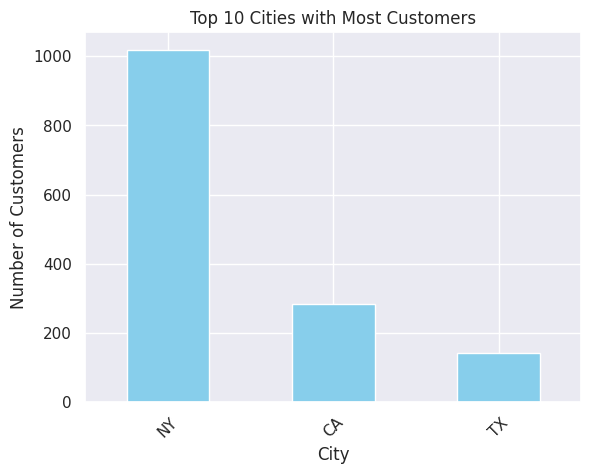

In [134]:
top_cities = customers_df['state'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with Most Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


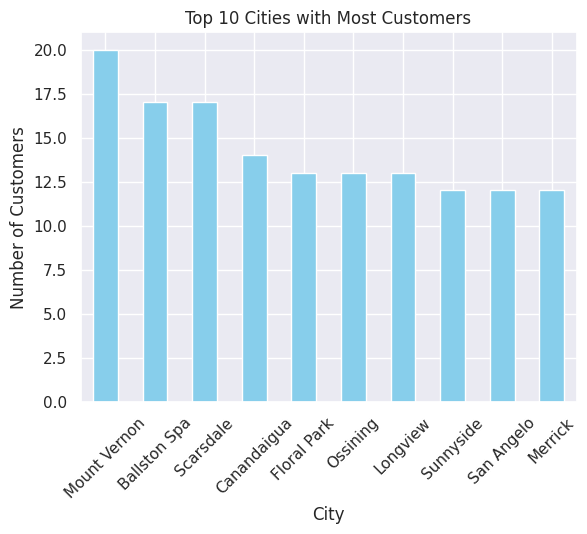

In [135]:
top_cities = customers_df['city'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with Most Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [136]:
# SQL query to get top 10 cities with the highest number of customers
query_top_10_cities = """
SELECT city,State, COUNT(*) AS customer_count
FROM customers
GROUP BY city
ORDER BY customer_count DESC
LIMIT 10;
"""
# Run the query and load data into a DataFrame
top_cities_df = pd.read_sql_query(query_top_10_cities, engine)
print(top_cities_df)


           city state  customer_count
0  Mount Vernon    NY              20
1     Scarsdale    NY              17
2  Ballston Spa    NY              17
3   Canandaigua    NY              14
4      Ossining    NY              13
5      Longview    TX              13
6   Floral Park    NY              13
7       Webster    NY              12
8     Sunnyside    NY              12
9     Smithtown    NY              12


In [137]:
# SQL query to get top 10 cities in CA with the highest number of customers
query_top_cities_ny = """
SELECT city, COUNT(*) AS customer_count
FROM customers
WHERE state = 'CA'
GROUP BY city
ORDER BY customer_count DESC
LIMIT 10;
"""
# Run the query and load data into a DataFrame
top_cities_ny_df = pd.read_sql_query(query_top_cities_ny, engine)
print(top_cities_ny_df)


                     city  customer_count
0          Canyon Country              12
1                  Upland              11
2          South El Monte              11
3            Apple Valley              11
4                 Anaheim              11
5             San Lorenzo              10
6  Palos Verdes Peninsula              10
7                  Oxnard              10
8                Campbell              10
9              San Carlos               9


<ipython-input-138-d1ddbca9ce14>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




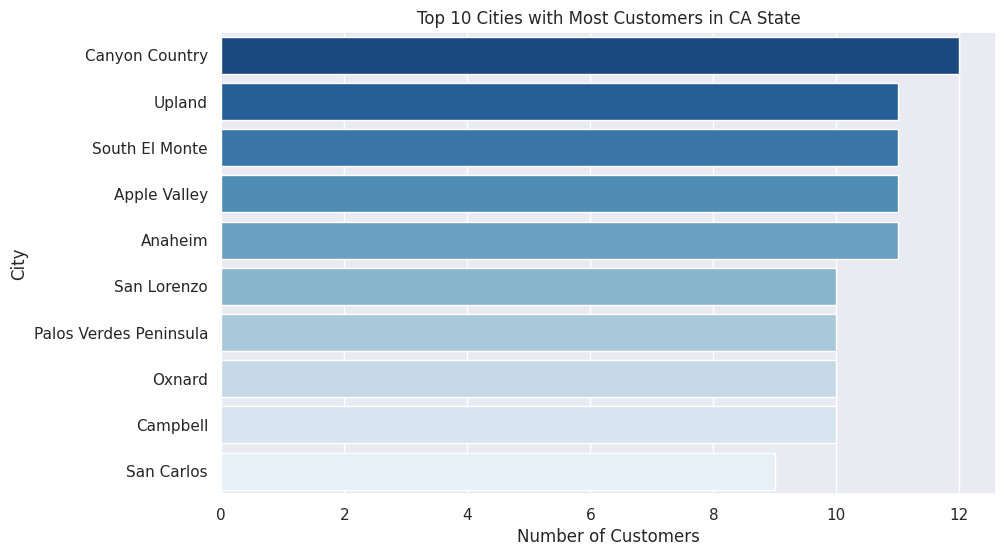

In [138]:
# Plot bar chart for top 10 cities in CA
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_ny_df, x='customer_count', y='city', palette='Blues_r')
plt.title("Top 10 Cities with Most Customers in CA State")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


In [139]:
# SQL query to get top 10 cities in NY with the highest number of customers
query_top_cities_ny = """
SELECT city, COUNT(*) AS customer_count
FROM customers
WHERE state = 'TX'
GROUP BY city
ORDER BY customer_count DESC
LIMIT 10;
"""
# Run the query and load data into a DataFrame
top_cities_ny_df = pd.read_sql_query(query_top_cities_ny, engine)
print(top_cities_ny_df)

             city  customer_count
0        Longview              13
1      San Angelo              12
2          Euless              10
3         Houston               9
4         Rowlett               8
5         Garland               8
6          Forney               8
7          Desoto               8
8  Corpus Christi               8
9        Victoria               7


<ipython-input-140-692948bebf3d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




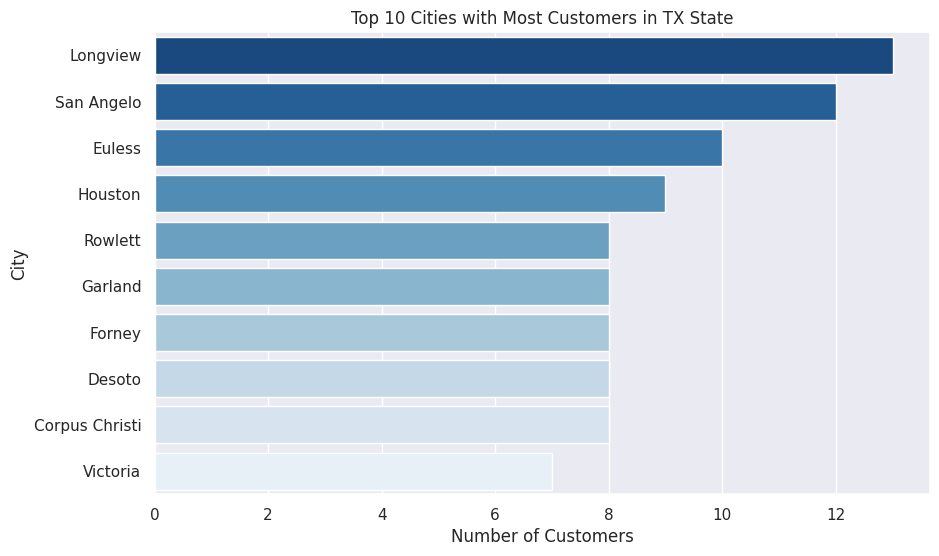

In [140]:
# Plot bar chart for top 10 cities in NY
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_ny_df, x='customer_count', y='city', palette='Blues_r')
plt.title("Top 10 Cities with Most Customers in TX State")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()

In [141]:
# SQL query to get the count of unique cities in each state
query_city_count_by_state = """
SELECT state, COUNT(DISTINCT city) AS city_count
FROM customers
GROUP BY state
ORDER BY city_count DESC;
"""
# Run the query and load data into a DataFrame
city_count_df = pd.read_sql_query(query_city_count_by_state, engine)
print(city_count_df)


  state  city_count
0    NY         134
1    CA          40
2    TX          21


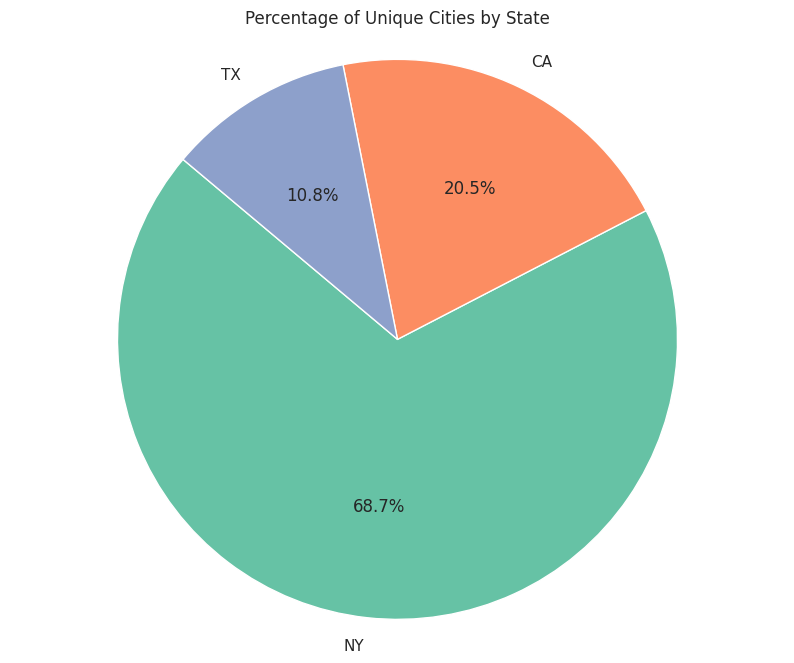

In [142]:
# Define a new vibrant color palette for the pie chart
custom_colors = sns.color_palette('Set2', len(city_count_df))  # 'Set2' for vibrant, distinct colors

# Plot pie chart for city count by state with new colors
plt.figure(figsize=(10, 8))
plt.pie(city_count_df['city_count'],
        labels=city_count_df['state'],
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_colors)  # Apply custom color palette

plt.title("Percentage of Unique Cities by State")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.show()



In [143]:
q4 = '''
SELECT * FROM order_items;
'''

df4 = pd.read_sql_query(q4, engine)
df4

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [144]:
q5 = '''
SELECT * FROM orders;
'''

df5 = pd.read_sql_query(q5, engine)
df5

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


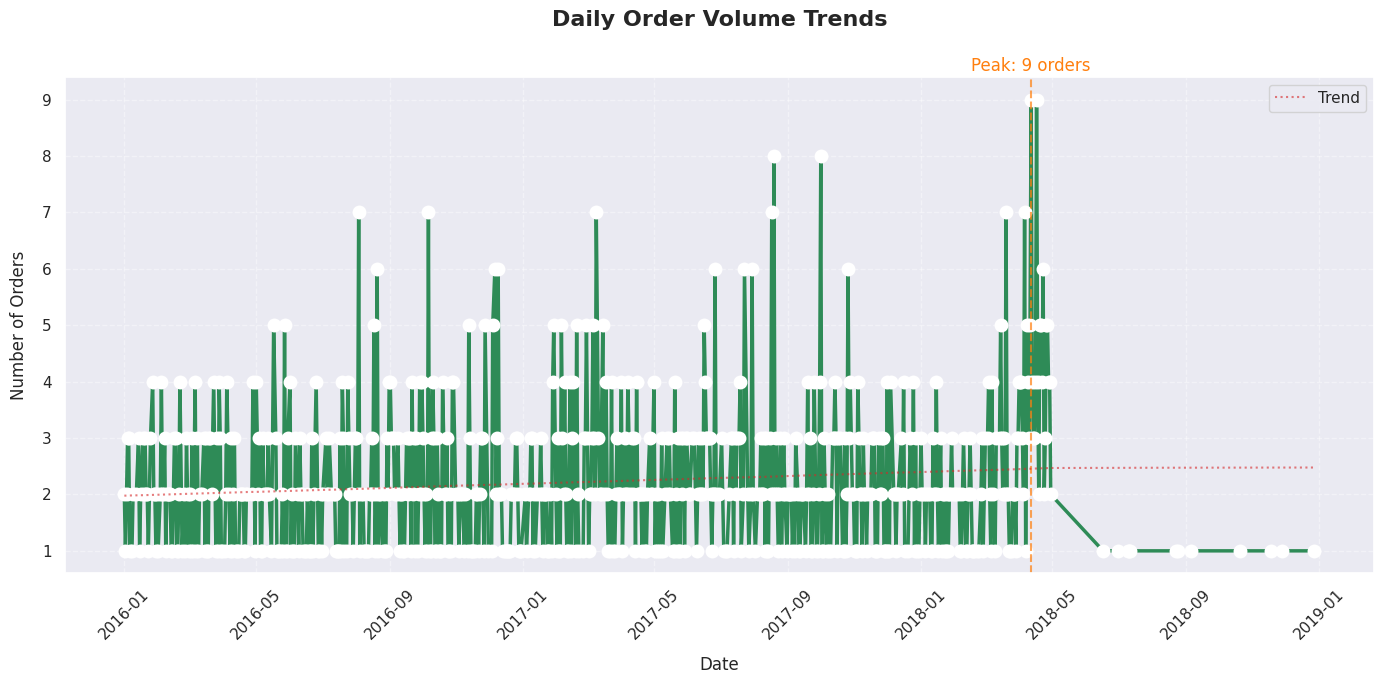

In [145]:
# Convert dates to datetime
df5['order_date'] = pd.to_datetime(df5['order_date'])

# Create daily order counts DataFrame
daily_orders = df5.groupby('order_date')['order_id'].count().reset_index()
daily_orders.columns = ['date', 'order_count']

# Set up visualization
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=daily_orders,
                 x='date',
                 y='order_count',
                 color='#2e8b57',  # Sea green color
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 markerfacecolor='white',
                 markeredgewidth=2)

# Highlight peak days
peak_day = daily_orders.loc[daily_orders['order_count'].idxmax()]
ax.axvline(x=peak_day['date'], color='#ff7f0e', linestyle='--', alpha=0.7)
ax.text(peak_day['date'], peak_day['order_count']+0.5,
        f"Peak: {peak_day['order_count']} orders",
        ha='center', color='#ff7f0e')

# Styling
plt.title('Daily Order Volume Trends\n',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Number of Orders', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()

# Add trendline if sufficient data points
if len(daily_orders) > 5:
    z = np.polyfit(range(len(daily_orders)), daily_orders['order_count'], 1)
    p = np.poly1d(z)
    plt.plot(daily_orders['date'], p(range(len(daily_orders))),
             color='#d62728',
             linestyle=':',
             alpha=0.6,
             label='Trend')
    plt.legend()

plt.show()

<ipython-input-146-4b46713d7817>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




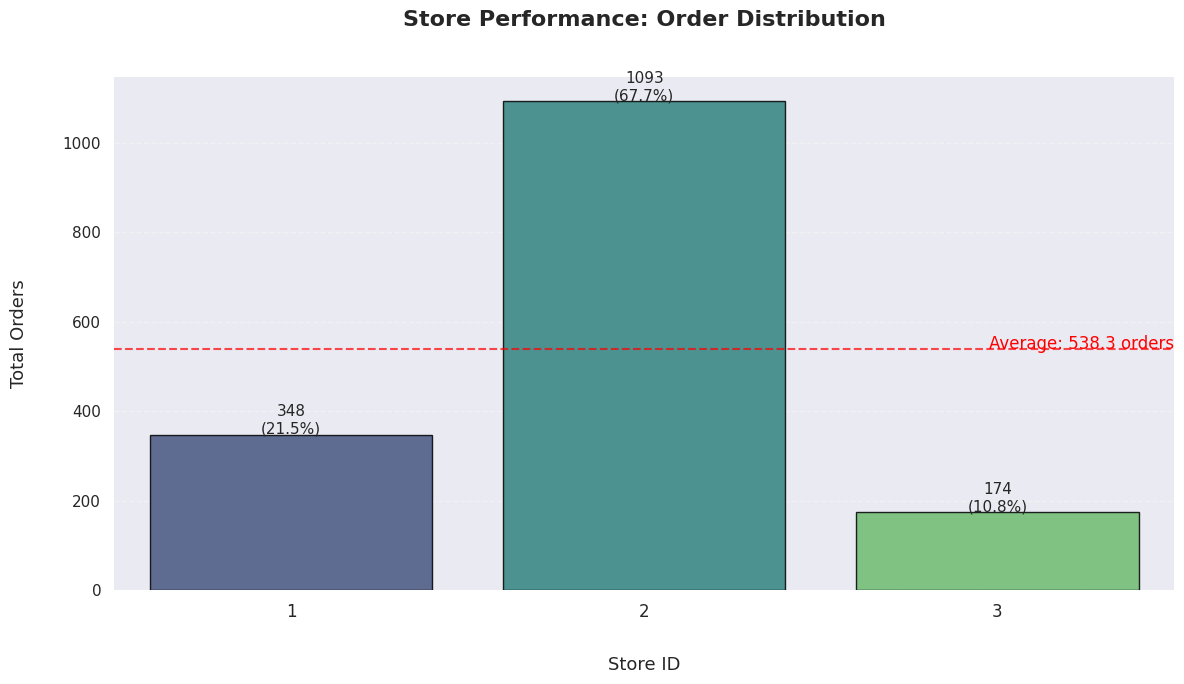

In [146]:
# Store Performance Analysis
plt.figure(figsize=(12, 7))

# Create store performance data
store_perf = df5['store_id'].value_counts().sort_index().reset_index()
store_perf.columns = ['store_id', 'order_count']

# Create bar plot with enhanced styling
ax = sns.barplot(data=store_perf,
                x='store_id',
                y='order_count',
                palette='viridis',
                edgecolor='black',
                linewidth=1,
                alpha=0.85)

# Add value labels with improved formatting
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}\n({p.get_height()/len(df5)*100:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=11)

# Add reference line for average
mean_orders = len(df5)/len(store_perf)
ax.axhline(mean_orders, color='red', linestyle='--', alpha=0.7)
ax.text(len(store_perf)-0.5, mean_orders+1,
        f'Average: {mean_orders:.1f} orders',
        color='red', ha='right')

# Styling and labels
plt.title('Store Performance: Order Distribution\n',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('\nStore ID', fontsize=13, labelpad=10)
plt.ylabel('Total Orders\n', fontsize=13, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [147]:
q6 = '''
SELECT * FROM products;
'''

df6 = pd.read_sql_query(q6, engine)
df6

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [148]:
q7 = '''
SELECT * FROM staffs;
'''

df7 = pd.read_sql_query(q7, engine)
df7

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [149]:
q8 = '''
SELECT * FROM stocks;
'''

df8 = pd.read_sql_query(q8, engine)
df8

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


In [150]:
q9 = '''
SELECT * FROM stores;
'''

df9 = pd.read_sql_query(q9, engine)
df9

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [151]:
query1 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN stocks ON products.product_id = stocks.product_id
JOIN stores ON stocks.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result1 = pd.read_sql_query(query1,engine)
result1

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


# Number of stocks based on category name and store name

In [152]:
store = result1['store_name'].unique()
result1['store_name'] = pd.Categorical(result1['store_name'], categories = store, ordered = True)

category = result1['category_name'].unique()
result1['category_name'] = pd.Categorical(result1['category_name'], categories = category, ordered = True)

In [153]:
import plotly.express as px
import pandas as pd
result1 = result1.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)
# Prepare data for Plotly (melted for bar chart)
result1_melted = result1.reset_index().melt(id_vars='category_name',
                                            var_name='store_name',
                                            value_name='sum_qty')

# Plot interactive bar chart using Plotly
fig = px.bar(result1_melted,
             x='category_name',
             y='sum_qty',
             color='store_name',
             title='Number of Stocks Based on Category Name and Store Name',
             labels={'category_name': 'Category Name', 'sum_qty': 'Quantity', 'store_name': 'Store Name'},
             color_discrete_map={'Santa Cruz Bikes': 'Red',
                                 'Baldwin Bikes': 'White',
                                 'Rowlett Bikes': 'Blue'}  # Custom colors
            )

# Update layout to match the previous theme
fig.update_layout(
    xaxis_title="Category Name",
    yaxis_title="Quantity",
    template="plotly_dark",  # Apply dark theme
    barmode="group",  # Grouped bar chart by store
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    height=700,  # Larger figure size
    width=1200,
    margin=dict(l=50, r=50, t=50, b=50)  # Add margins for better visualization
)

# Add hover template for detailed display
fig.update_traces(
    hovertemplate="<b>Category:</b> %{x}<br><b>Store:</b> %{legendgroup}<br><b>Stock Quantity:</b> %{y}"
)

# Show the interactive chart
fig.show()


<ipython-input-153-efd67a7dcc26>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Number of order items based on category name and store name

In [154]:
query2 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN order_items ON products.product_id = order_items.product_id
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result2 = pd.read_sql_query(query2, engine)
result2

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
2,Baldwin Bikes,Cruisers Bicycles,1396
3,Baldwin Bikes,Cyclocross Bicycles,271
4,Baldwin Bikes,Electric Bikes,202
5,Baldwin Bikes,Mountain Bikes,1170
6,Baldwin Bikes,Road Bikes,374
7,Rowlett Bikes,Children Bicycles,117
8,Rowlett Bikes,Comfort Bicycles,87
9,Rowlett Bikes,Cruisers Bicycles,245


In [155]:
store = result2['store_name'].unique()
result2['store_name'] = pd.Categorical(result2['store_name'], categories = store, ordered = True)

category = result2['category_name'].unique()
result2['category_name'] = pd.Categorical(result2['category_name'], categories = category, ordered = True)

In [156]:
import plotly.express as px
import pandas as pd

result2 = result2.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)
# Prepare data for Plotly (melted for bar chart)
result2_melted = result2.reset_index().melt(id_vars='category_name',
                                            var_name='store_name',
                                            value_name='sum_qty')

# Plot interactive bar chart using Plotly
fig = px.bar(result2_melted,
             x='category_name',
             y='sum_qty',
             color='store_name',
             title='Number of Order Items Based on Category Name and Store Name',
             labels={'category_name': 'Category Name', 'sum_qty': 'Quantity', 'store_name': 'Store Name'},
             color_discrete_map={'Santa Cruz Bikes': 'Red',
                                 'Baldwin Bikes': 'White',
                                 'Rowlett Bikes': 'blue'}  # Custom colors
            )

# Update layout to match the previous theme
fig.update_layout(
    xaxis_title="Category Name",
    yaxis_title="Quantity",
    template="plotly_dark",  # Apply dark theme
    barmode="group",  # Grouped bar chart by store
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    height=700,  # Larger figure size
    width=1200,
    margin=dict(l=50, r=50, t=50, b=50)  # Add margins for better visualization
)

# Add hover template for detailed display
fig.update_traces(
    hovertemplate="<b>Category:</b> %{x}<br><b>Store:</b> %{legendgroup}<br><b>Order Quantity:</b> %{y}"
)

# Show the interactive chart
fig.show()

<ipython-input-156-07539c0cacb2>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [157]:
query3 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Santa Cruz Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result3 = pd.read_sql_query(query3, engine)
result3

,year_month,total_price
0,2016 01,71760.3064
1,2016 02,35255.4513
2,2016 03,46817.6251
3,2016 04,34230.6401
4,2016 05,28095.2399
5,2016 06,41554.1683
6,2016 07,21258.8857
7,2016 08,44803.6003
8,2016 09,65159.6319
9,2016 10,69175.4980


In [158]:
result3['year_month'] = pd.to_datetime(result3['year_month'], format = '%Y %m')

In [159]:
query3 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Baldwin Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result4 = pd.read_sql_query(query3, engine)
result4

,year_month,total_price
0,2016 01,132894.2968
1,2016 02,102201.9071
2,2016 03,110338.7916
3,2016 04,120491.9842
4,2016 05,150679.6523
5,2016 06,139021.3866
6,2016 07,167320.8731
7,2016 08,142994.2888
8,2016 09,164368.6516
9,2016 10,129251.7324


In [160]:
result4['year_month'] = pd.to_datetime(result3['year_month'], format = '%Y %m')

In [161]:
query3 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Rowlett Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result5 = pd.read_sql_query(query3, engine)
result5

,year_month,total_price
0,2016 01,10491.8209
1,2016 02,18654.9644
2,2016 03,23443.9118
3,2016 04,12421.4269
4,2016 05,26495.1169
5,2016 06,29986.5696
6,2016 07,10977.0501
7,2016 08,37859.4876
8,2016 09,43563.3262
9,2016 10,13650.8501


In [162]:
result5['year_month'] = pd.to_datetime(result3['year_month'], format = '%Y %m')

In [163]:
import plotly.express as px
import pandas as pd

# Combine data for all stores
result3['store_name'] = 'Santa Cruz Bikes'
result4['store_name'] = 'Baldwin Bikes'
result5['store_name'] = 'Rowlett Bikes'

# Concatenate all dataframes
all_data = pd.concat([result3, result4, result5], ignore_index=True)

# Convert 'year_month' to datetime for proper ordering
all_data['year_month'] = pd.to_datetime(all_data['year_month'], format='%Y %m')

# Plot interactive line chart using Plotly
fig = px.line(all_data,
              x='year_month',
              y='total_price',
              color='store_name',
              markers=True,  # Add dots to each data point
              title='Monthly Total Sales for Santa Cruz, Baldwin, and Rowlett Bikes',
              labels={'year_month': 'Year-Month', 'total_price': 'Total Sales ($)', 'store_name': 'Store Name'},
              color_discrete_map={'Santa Cruz Bikes': 'Red', 'Baldwin Bikes': 'white', 'Rowlett Bikes': 'blue'}  # Custom colors
             )

# Update layout to match the previous theme
fig.update_layout(
    xaxis_title="Year-Month",
    yaxis_title="Total Sales ($)",
    template="plotly_dark",  # Dark theme
    hovermode="x unified",  # Show hover values for all stores at the same time
    xaxis=dict(showgrid=True),  # Show grid lines for better readability
    yaxis=dict(showgrid=True),
)

# Add hover template to show detailed info when hovering over points
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Store: %{legendgroup}<br>Total Sales: $%{y:,.2f}",
    line=dict(width=2),  # Make lines bolder
    marker=dict(size=8, symbol="circle")  # Make dots larger and circular
)

# Show interactive plot
fig.show()


In [164]:
# SQL query to get all staff names with number of orders handled
query_staff_orders = """
SELECT s.staff_id,
       s.first_name || ' ' || s.last_name AS staff_name,
       COUNT(o.order_id) AS total_orders
FROM staffs s
LEFT JOIN orders o ON s.staff_id = o.staff_id
GROUP BY s.staff_id, staff_name
ORDER BY total_orders DESC;
"""

# Run the query and load the result into a DataFrame
staff_orders_df = pd.read_sql_query(query_staff_orders, engine)

# Display result
print(staff_orders_df)


   staff_id          staff_name  total_orders
0         6     Marcelene Boyer           553
1         7       Venita Daniel           540
2         3       Genna Serrano           184
3         2     Mireya Copeland           164
4         8         Kali Vargas            88
5         9       Layla Terrell            86
6         1     Fabiola Jackson             0
7         4      Virgie Wiggins             0
8         5      Jannette David             0
9        10  Bernardine Houston             0


In [165]:
# Plot interactive bar chart using Plotly
fig = px.bar(staff_orders_df,
             x='total_orders',
             y='staff_name',
             orientation='h',  # Horizontal bar chart
             title="Number of Orders Handled by Each Staff Member",
             labels={'total_orders': 'Total Orders', 'staff_name': 'Staff Name'},
             color='total_orders',  # Color based on order count
             color_continuous_scale='Plasma')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Total Orders",
    yaxis_title="Staff Name",
    yaxis=dict(autorange="reversed"),  # Reverse y-axis for better order
    template="plotly_dark"  # Dark theme for better contrast
)

# Add hover template to show detailed info on hover
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Total Orders: %{x}"
)

# Show interactive plot
fig.show()


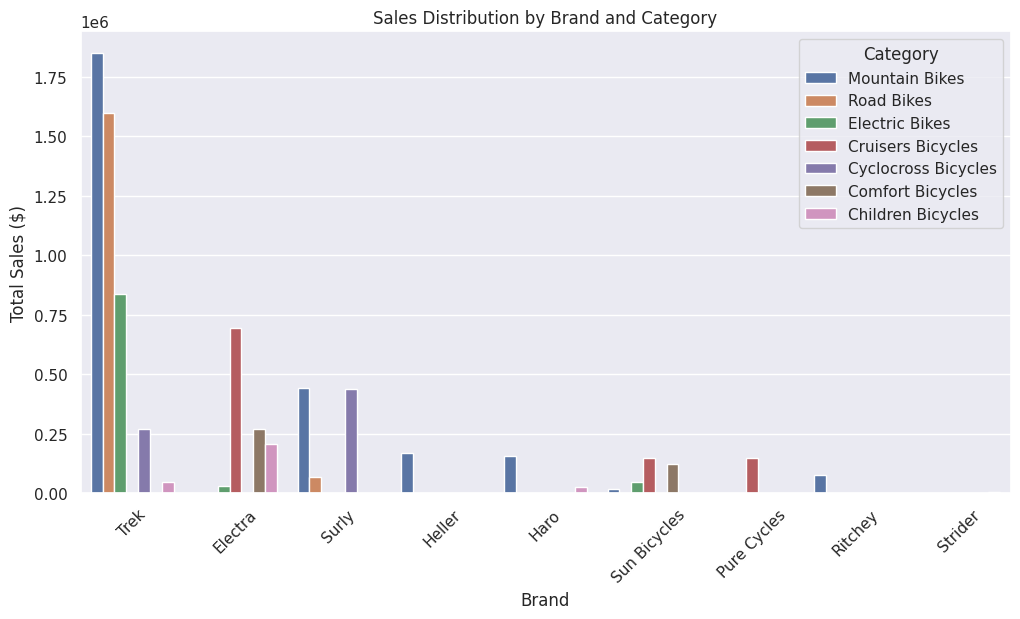

In [166]:
# Query: Sales by Brand and Category
query = """
SELECT b.brand_name, c.category_name, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN brands b ON p.brand_id = b.brand_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY b.brand_name, c.category_name
ORDER BY total_sales DESC
"""
df_sales = pd.read_sql_query(query, engine)

# Visualization: Sales Distribution by Brand and Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sales, x='brand_name', y='total_sales', hue='category_name')
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Total Sales ($)")
plt.title("Sales Distribution by Brand and Category")
plt.legend(title="Category")
plt.show()
